In [12]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_rebalance, backtest_dca

In [13]:
start = "2023-01-01"
end = "2026-01-01"

symbols = {
    "ETH": "ETH-USD",
    "DOT": "DOT-USD",
    "ADA": "ADA-USD",
    "SOL": "SOL-USD",
    "LINK": "LINK-USD",
    "BTC": "BTC-USD",
    "ATOM": "ATOM-USD",
    "AVAX": "AVAX-USD",
}

initial_capital = 1.0
target_weights = None
threshold = 0.05
fee = 0.001   

In [14]:
# df = pd.DataFrame()
# for k, v in symbols.items():
#     df[k] = yf.download(v, start=start, end=end)["Close"]

# df.to_csv("prices.csv")

In [15]:
df = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df

,ETH,DOT,ADA,SOL,LINK,BTC,ATOM,AVAX
Date,,,,,,,,
2023-01-01,1200.964844,4.370816,0.249771,9.982173,5.622443,16625.080078,9.464469,10.865915
2023-01-02,1214.656616,4.489374,0.253828,11.272967,5.687627,16688.470703,9.802422,11.153615
2023-01-03,1214.778809,4.524364,0.252796,13.344046,5.622096,16679.857422,10.161021,11.384450
2023-01-04,1256.526611,4.630191,0.267677,13.435113,5.804032,16863.238281,10.198363,12.077613
2023-01-05,1250.438599,4.617662,0.269102,13.419330,5.647835,16836.736328,10.076512,11.740196
...,...,...,...,...,...,...,...,...
2025-12-27,2947.998291,1.913854,0.369542,124.647713,12.497621,87802.156250,2.081378,12.686422
2025-12-28,2948.568115,1.848762,0.368502,125.199356,12.477210,87835.835938,2.073132,12.636359
2025-12-29,2934.538330,1.822235,0.352915,123.125229,12.290201,87138.140625,1.963394,12.357569


In [16]:
df = df[['SOL', 'DOT', 'ETH', 'ADA']]
df = df[df.index >= '2025-01-01']

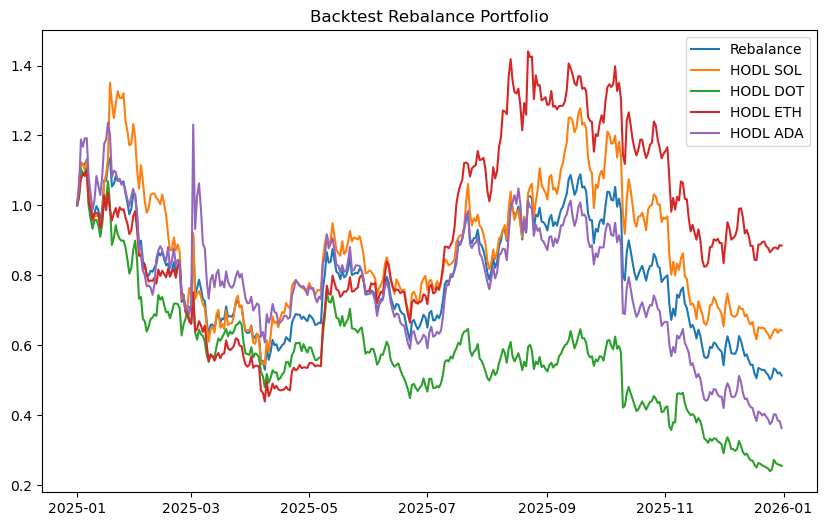

In [17]:
result, metrics = backtest_rebalance(df, target_weights=target_weights, initial_capital=initial_capital, threshold=threshold, fee=fee)

In [18]:
metrics

{'Rebalance_final': 0.5131685580792696,
 'Rebalance_MDD': -0.5577671217960468,
 'Num_rebalances': 6,
 'HODL_SOL_final': 0.6420904177799129,
 'HODL_SOL_MDD': -0.5970814063900631,
 'HODL_DOT_final': 0.25456896062773315,
 'HODL_DOT_MDD': -0.7833822346649968,
 'HODL_ETH_final': 0.8847573954278964,
 'HODL_ETH_MDD': -0.6007838805465938,
 'HODL_ADA_final': 0.3627211394823873,
 'HODL_ADA_MDD': -0.7067892006515795}

/Users/aleksejkitajskij/Desktop/rebalance/backtest.py:223: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  invested_monthly = invested_series.resample("M").last()


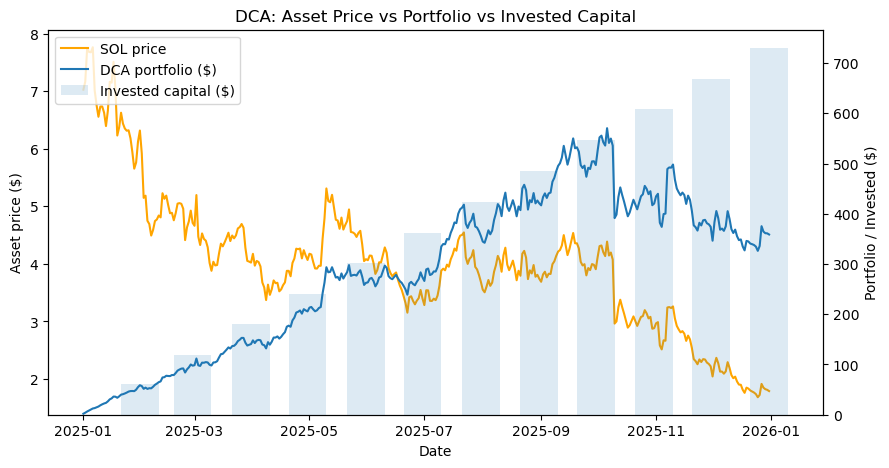

{'Total_invested': 730.0,
 'Final_value': 358.792100280229,
 'ROI': -0.5085039722188643,
 'MDD': -0.42805821242254616,
 'Total_qty': 200.53225010508982}

In [19]:
sol_prices = df["DOT"]

dca_result, dca_metrics = backtest_dca(
    prices=sol_prices,
    buy_amount=2.0,
    freq="D",
    fee=0.001,
    plot=True
)

dca_metrics

In [20]:
dca_result

,Portfolio,Invested,Normalized
Date,,,
2025-01-01,1.998000,730.0,0.002737
2025-01-02,4.035973,730.0,0.005529
2025-01-03,6.359654,730.0,0.008712
2025-01-04,8.305879,730.0,0.011378
2025-01-05,10.298186,730.0,0.014107
...,...,...,...
2025-12-27,375.373781,730.0,0.514211
2025-12-28,364.604967,730.0,0.499459
2025-12-29,361.371416,730.0,0.495029
